In [ ]:

# Group No - 206

# Bits ID :
# 2023AC05830 - Vidhya Dilip Korgaoker
# 2023AC05796 - Sagar Mahapatro
# 2023AD05101 - Kaustav Biswas
# 2023AC05645 - Abhinav Gazta

# Problem Statement - Analysis on Weather Data



Load file path  C:/Users/Vidhya/Desktop/Study/Semester 1/ML/Assignments/weatherAUS.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           29999 non-null  object 
 1   Location       29999 non-null  object 
 2   MinTemp        29504 non-null  float64
 3   MaxTemp        29632 non-null  float64
 4   Rainfall       29321 non-null  float64
 5   Evaporation    11034 non-null  float64
 6   Sunshine       6669 non-null   float64
 7   WindGustDir    26153 non-null  object 
 8   WindGustSpeed  26157 non-null  float64
 9   WindDir9am     25621 non-null  object 
 10  WindDir3pm     27935 non-null  object 
 11  WindSpeed9am   29197 non-null  float64
 12  WindSpeed3pm   28550 non-null  float64
 13  Humidity9am    29349 non-null  float64
 14  Humidity3pm    28683 non-null  float64
 15  Pressure9am    23336 non-null  float64
 16  Pressur

C:\Users\Vidhya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


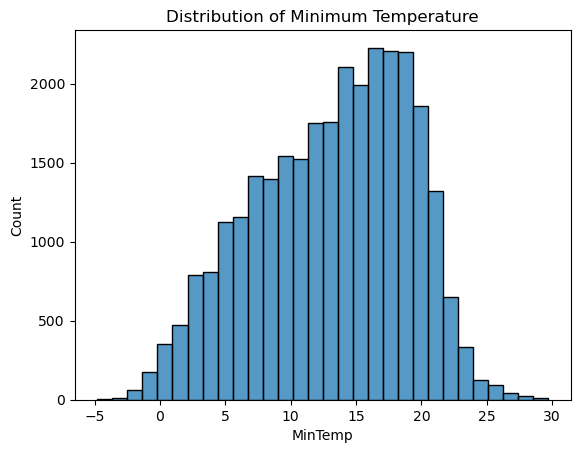

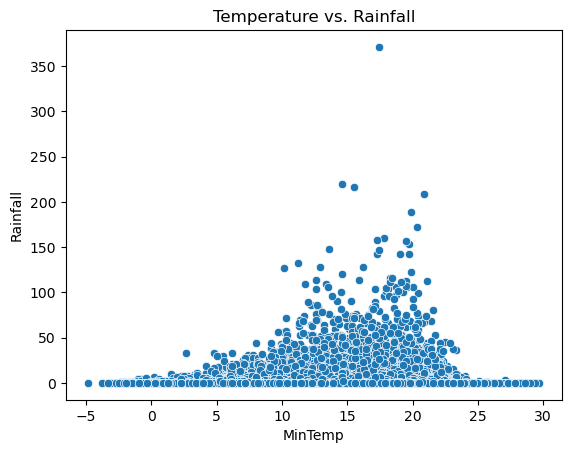

C:\Users\Vidhya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vidhya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


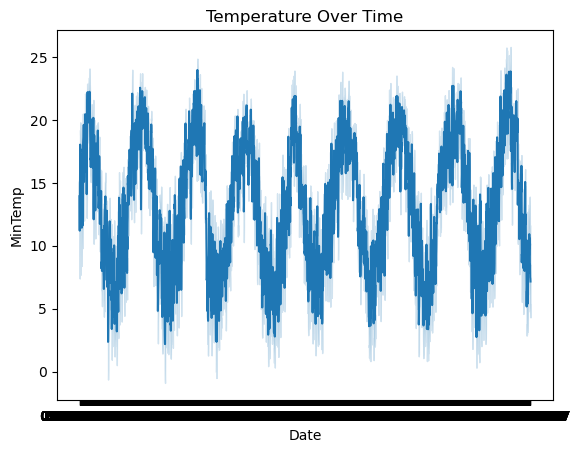

 
 The correlation result
 -: MinTemp          0.144365
MaxTemp         -0.129635
Rainfall         0.217598
Evaporation     -0.094591
Sunshine        -0.493238
WindGustSpeed    0.188120
WindSpeed9am     0.083863
WindSpeed3pm     0.060908
Humidity9am      0.252243
Humidity3pm      0.437424
Pressure9am     -0.124791
Pressure3pm     -0.104199
Cloud9am         0.309101
Cloud3pm         0.352027
Temp9am          0.022654
Temp3pm         -0.163375
dtype: float64 
 Axes(0.125,0.11;0.775x0.77)


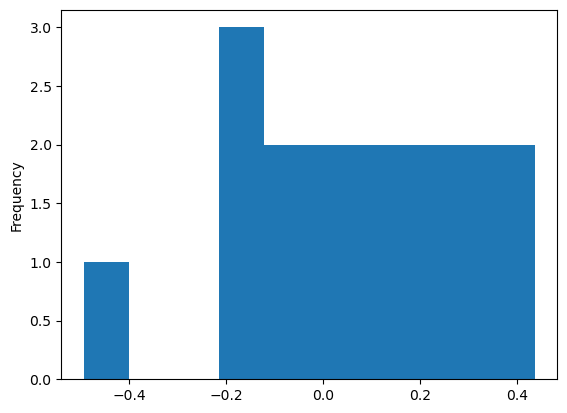

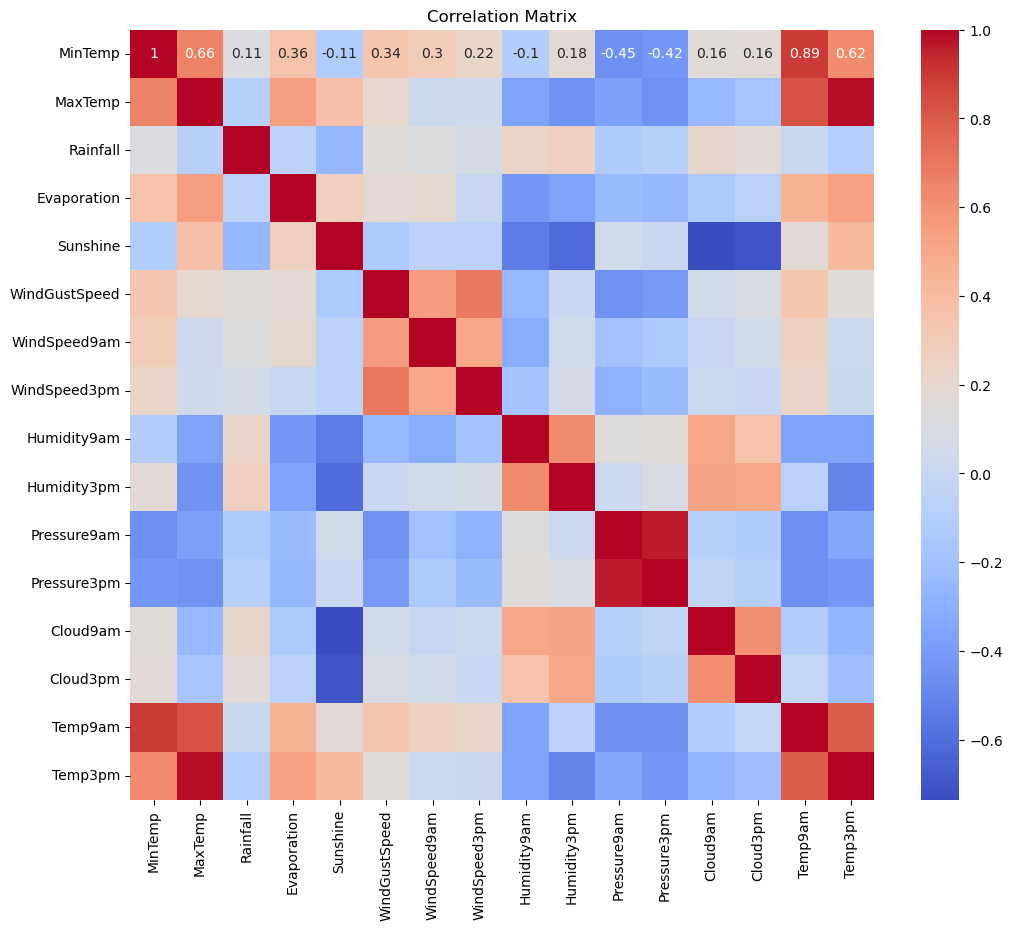

C:\Users\Vidhya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vidhya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vidhya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vidhya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

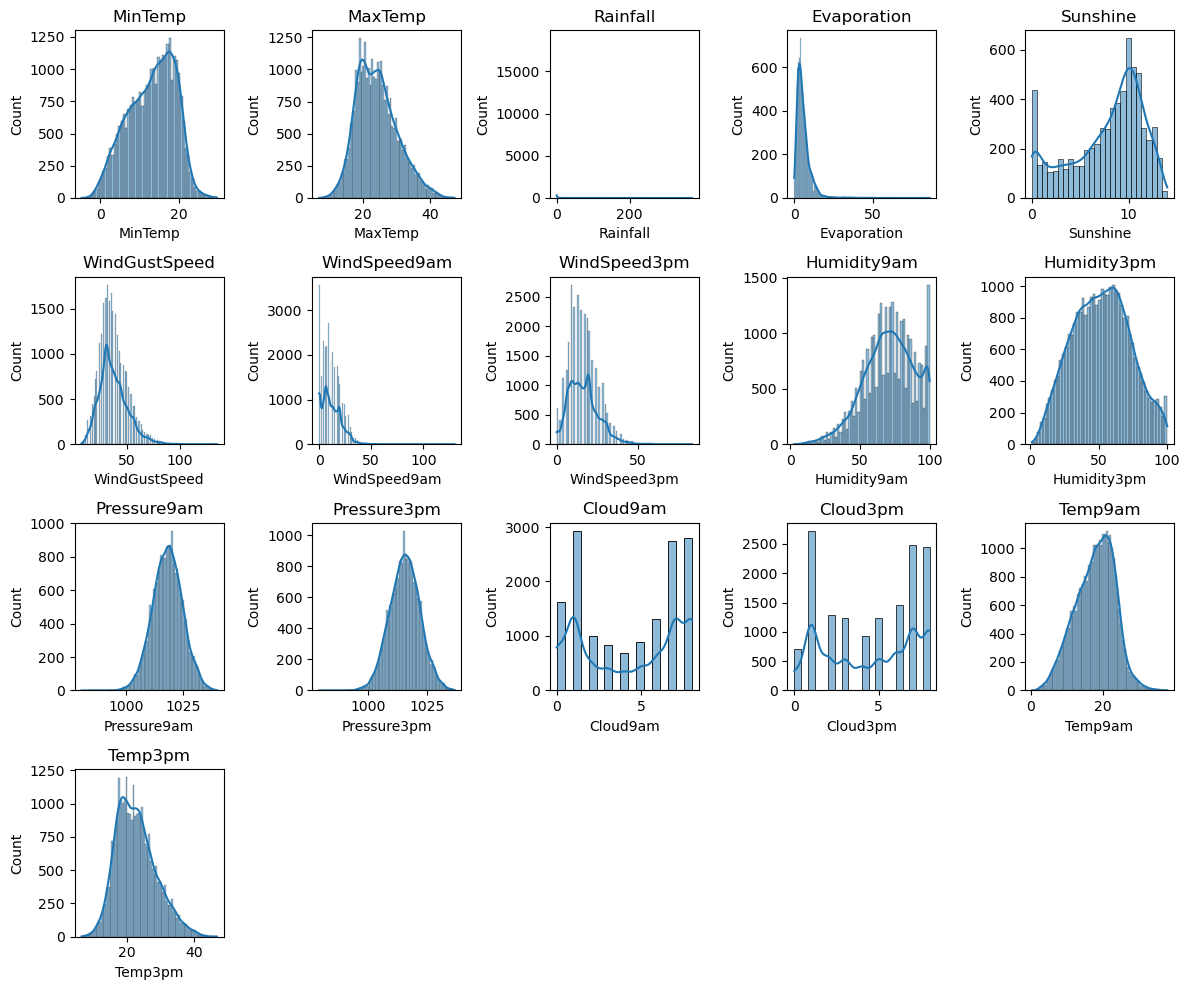

           Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  1.228090e+18   Albury     13.4     22.9       0.6          NaN       NaN   
1  1.228176e+18   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Cloud9am  Cloud3pm  Temp9am  \
0           W           44.0          W  ...      8.0       NaN     16.9   
1         WNW           44.0        NNW  ...      NaN       NaN     17.2   

   Temp3pm  RainToday  RainTomorrow  Year  Month  Day  TempDiff  
0     21.8         No             0  2008     12    1       9.5  
1     24.3         No             0  2008     12    2      17.7  

[2 rows x 27 columns]
Train file saved to cleaned_weather_train.csv
Test file saved to cleaned_weather_test.csv


In [4]:

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


load_file_path = 'C:/Users/Vidhya/Desktop/Study/Semester 1/ML/Assignments/weatherAUS.csv'
print("Load file path ", load_file_path)
weatherDF = pd.read_csv(load_file_path)
#  details on the weather data set
weatherDF.info()
print(weatherDF.describe())
# Print the first two rows of the dataset..as mentioned part of assigment 
weatherDF.head(2)
# weather data...

# Visulaization
sns.histplot(weatherDF['MinTemp'], bins=30)
plt.title('Distribution of Minimum Temperature')
plt.show()

# Scatter plot of temperature vs. rainfall
sns.scatterplot(x='MinTemp', y='Rainfall', data=weatherDF)
plt.title('Temperature vs. Rainfall')
plt.show()

# Line chart of temperature over time
sns.lineplot(x='Date', y='MinTemp', data=weatherDF)
plt.title('Temperature Over Time')
plt.show()

# Heatmap of correlations , drop some columns for easy correlation.
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm']

corrMatrix = weatherDF[numeric_cols]
weatherDF['RainTomorrow'] = weatherDF['RainTomorrow'].astype('category').cat.codes
corrResult = corrMatrix.corrwith(weatherDF['RainTomorrow'])
print(" \n The correlation result\n -:", corrResult, "\n", corrResult.plot(kind="hist"))
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Other plots as part of EDA for the data given. 

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i+1)
    sns.histplot(weatherDF[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Create new features , preprocessing and feature engineering...
# Extract year, month, and day from the 'Date' column
# Convert date column to datetime
weatherDF['Date'] = pd.to_datetime(weatherDF['Date'],format='%d-%m-%Y')
weatherDF['Date'] = weatherDF['Date'].values.astype("float64")
weatherDF['Year'] = pd.to_datetime(weatherDF['Date']).dt.year
weatherDF['Month'] = pd.to_datetime(weatherDF['Date']).dt.month
weatherDF['Day'] = pd.to_datetime(weatherDF['Date']).dt.day

# Calculate the difference between max and min temperature
weatherDF['TempDiff'] = weatherDF['MaxTemp'] - weatherDF['MinTemp']

# Perform imputation for missing values
print(weatherDF.head(2))

imputer = SimpleImputer(strategy='mean')
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm']
weatherDF[numeric_cols] = imputer.fit_transform(weatherDF[numeric_cols])

# Log transform skewed features
skewed_features = ['Rainfall', 'Evaporation']
weatherDF[skewed_features] = np.log1p(weatherDF[skewed_features])

# Drop unnecessary columns
weatherDF.drop([ 'Date'], axis=1, inplace=True)

# Encode categorical variables
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
data = pd.get_dummies(weatherDF, columns=categorical_cols, drop_first=True)

# Handle missing values (replace 'NA' with appropriate values)
data = weatherDF.fillna(0)  # Example: Replace 'NA' with 0 for rainfall

# Define features for standardization and normalization
standardize_cols = ['MinTemp', 'MaxTemp','Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm']
normalize_cols = ['Cloud9am', 'Cloud3pm']  # Example: Normalize cloud coverage

# Standardize features
scaler = StandardScaler()
weatherDF[standardize_cols] = scaler.fit_transform(data[standardize_cols])

# Normalize features
scaler = MinMaxScaler()
weatherDF[normalize_cols] = scaler.fit_transform(data[normalize_cols])

weatherDF.head(5)


# Load the dataset
file_path = 'C:/Users/Vidhya/Desktop/Study/Semester 1/ML/Assignments/weatherAUS.csv'
df = pd.read_csv(file_path)

# Dropping columns with more than 40% missing data
df_dropped = df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

# Imputing missing values for numerical columns using median
numerical_columns = df_dropped.select_dtypes(include=['float64']).columns
df_dropped[numerical_columns] = df_dropped[numerical_columns].fillna(df_dropped[numerical_columns].median())

# Imputing missing values for categorical columns using mode
categorical_columns = df_dropped.select_dtypes(include=['object']).columns
df_dropped[categorical_columns] = df_dropped[categorical_columns].fillna(df_dropped[categorical_columns].mode().iloc[0])

# Handling skewness by applying log transformation to highly skewed columns
df_dropped['Rainfall'] = np.log1p(df_dropped['Rainfall'])  # log1p is used to avoid log(0)
df_dropped['WindGustSpeed'] = np.log1p(df_dropped['WindGustSpeed'])

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_dropped, drop_first=True)

# Separating features and target variable
if 'RainTomorrow_Yes' in df_encoded.columns:
    X = df_encoded.drop('RainTomorrow_Yes', axis=1)
    y = df_encoded['RainTomorrow_Yes']
else:
    X = df_encoded.drop('RainTomorrow', axis=1)
    y = df_encoded['RainTomorrow']

# Standardization
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
importances = rf.feature_importances_
feature_names = X_scaled.columns

# Create a dataframe for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Selecting top 20 features
top_features = feature_importances.head(20)['Feature'].tolist()
X_selected = X_scaled[top_features]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Combining the cleaned and selected features with the target variable for final output
final_df_train = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
final_df_test = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Saving the cleaned datasets to CSV files
train_file_path = 'cleaned_weather_train.csv'
test_file_path = 'cleaned_weather_test.csv'

final_df_train.to_csv(train_file_path, index=False)
final_df_test.to_csv(test_file_path, index=False)

print(f'Train file saved to {train_file_path}')
print(f'Test file saved to {test_file_path}')


In [5]:
#Vidhya Begins
# Train the Logistic Regression model
# Initialize Logistic Regression function
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Logistic Regression Accuracy on Test Set after Preprocessing: {:.2f}%".format(accuracy * 100))

Logistic Regression Accuracy on Test Set after Preprocessing: 84.33%


In [6]:
print("******After Hyperparameters Tuning***********")
# Define the hyperparameter grid
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
                      'penalty': ['l2'],   # Type of regularization
                      'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Optimization algorithm
                      'max_iter': [100, 200, 300]                      # Maximum number of iterations
                     }
    
# Set up GridSearchCV
grid_search_log_reg = GridSearchCV(estimator=model, param_grid=param_grid_log_reg, cv=5, scoring='accuracy',error_score='raise')

# Fit the grid search
grid_search_log_reg.fit(X_train, y_train)    

# Best hyperparameters
print("Best hyperparameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best score for Logistic Regression: {:.2f}%".format(grid_search_log_reg.best_score_ *100))

# Evaluate on test set
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
print("Logistic Regression Accuracy on Test Set after tuning: {:.2f}%".format(accuracy_score(y_test, y_pred_log_reg)*100))


******After Hyperparameters Tuning***********
Best hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Logistic Regression: 84.80%
Logistic Regression Accuracy on Test Set after tuning: 84.32%


In [7]:
#********* After tuning
model = LogisticRegression(C= 0.1, max_iter = 100, penalty =  'l2', solver = 'liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("****** After Hyperparameters identification - Retraining Model***********")
print("Logistic Regression Accuracy on Test Set after Tuning : {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

****** After Hyperparameters identification - Retraining Model***********
Logistic Regression Accuracy on Test Set after Tuning : 84.32%
Confusion Matrix:
[[4475  251]
 [ 690  584]]
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.95      0.90      4726
        True       0.70      0.46      0.55      1274

    accuracy                           0.84      6000
   macro avg       0.78      0.70      0.73      6000
weighted avg       0.83      0.84      0.83      6000



In [8]:
# Initialize the Decision Tree Classifier
model_tree = DecisionTreeClassifier(max_depth=3)

# Train the model
model_tree.fit(X_train, y_train)

# Make predictions
y_pred = model_tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred)
conf_matrix_tree = confusion_matrix(y_test, y_pred)
class_report_tree = classification_report(y_test, y_pred)

print("Decision Tree Accuracy on Test Set: {:.2f}%".format(accuracy_tree * 100))


Decision Tree Accuracy on Test Set: 82.93%


In [9]:
print("******After Hyperparameters Tuning***********")
# Define the hyperparameter grid
param_grid = { 'criterion': ['gini', 'entropy'],            # Function to measure the quality of a split
               'max_depth': [1, 2, 3, 4],         # Maximum depth of the tree
               'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
               'min_samples_leaf': [1, 2, 5, 10],            # Minimum number of samples required at a leaf node
               'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Set up GridSearchCV
grid_search_decision_tree = GridSearchCV(estimator=model_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters for Decision Tree:", grid_search_decision_tree.best_params_)
print("Best score for Decision Tree: {:.2f}%".format(grid_search_decision_tree.best_score_*100))
    

# Evaluate on test set
best_decision_tree = grid_search_decision_tree.best_estimator_
y_pred_decision_tree = best_decision_tree.predict(X_test)
print("Decision Tree Accuracy on Test Set: {:.2f}%".format(accuracy_score(y_test, y_pred_decision_tree)*100))
print("Confusion Matrix:")
print(conf_matrix_tree)
print("Classification Report:")
print(class_report_tree)

******After Hyperparameters Tuning***********
Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score for Decision Tree: 83.14%
Decision Tree Accuracy on Test Set: 83.00%
Confusion Matrix:
[[4430  296]
 [ 728  546]]
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.94      0.90      4726
        True       0.65      0.43      0.52      1274

    accuracy                           0.83      6000
   macro avg       0.75      0.68      0.71      6000
weighted avg       0.81      0.83      0.82      6000



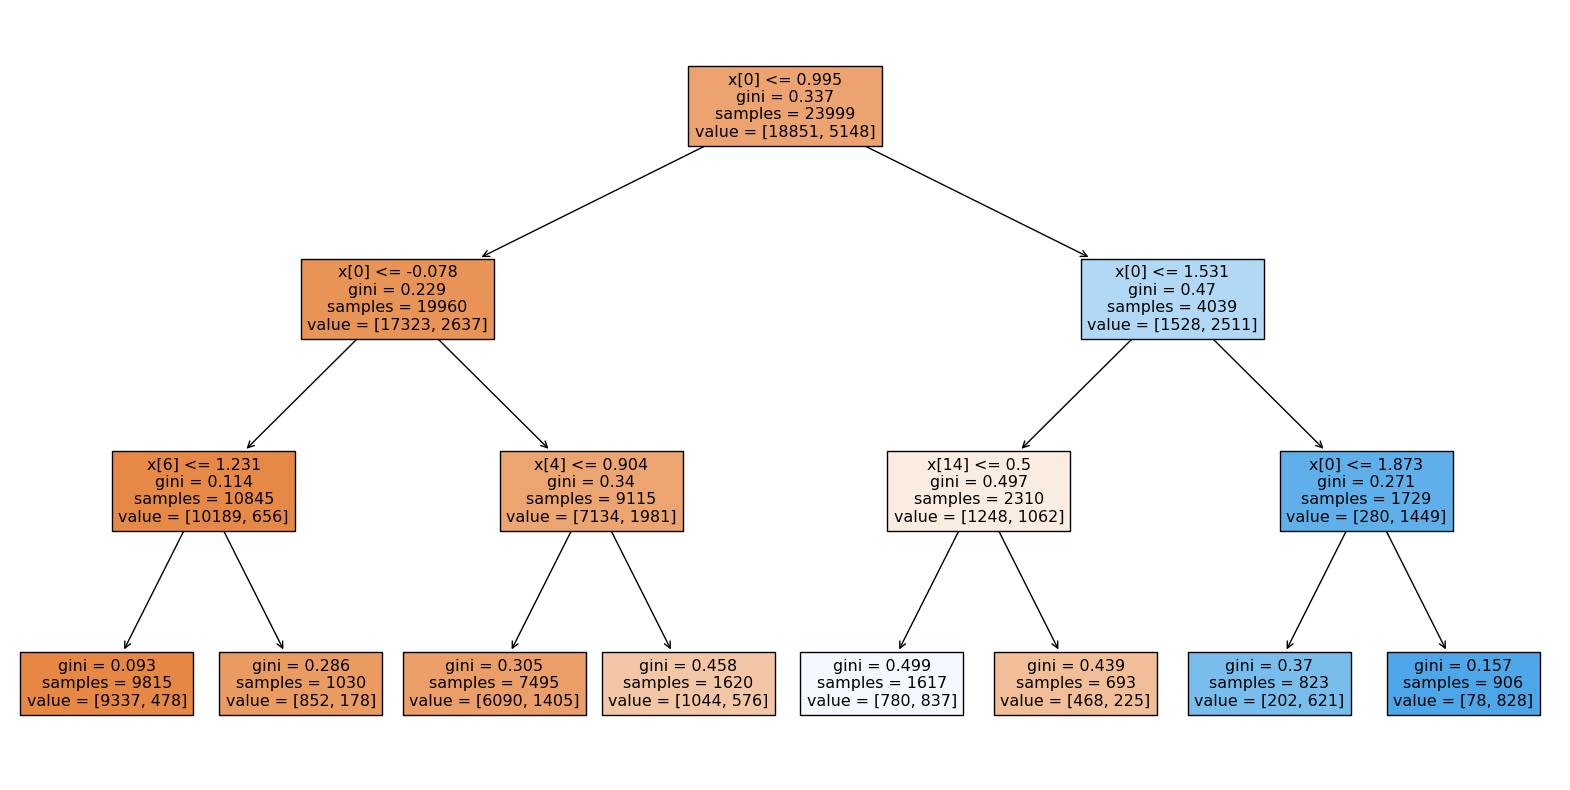

In [10]:
# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model_tree, feature_names=None, class_names=None, filled=True)
plt.show()

In [ ]:
#KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

mean_acc = np.zeros(10)
for i in range(1,11):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc
 # for data visualiztions


oc = np.arange(1,11,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,11), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
print("score", g_res.best_score_)
print(" params ", g_res.best_params_)
knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

In [ ]:
# Naive Bayesian Model

from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import metrics

model = GaussianNB()

np.random.seed(10)
model.fit(X_train,y_train)

pred_all = model.predict(X_selected)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


print(f'Accuracy Score on Train Data : {round(accuracy_score(y_train, pred_train),2)*100}')
print(f'Accuracy Score on Test Data : {round(accuracy_score(y_test, pred_test),2)*100}')
print(classification_report(y,pred_all))


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);
print("params",gs_NB.best_params_)
print("score",gs_NB.gs_NB.best_score_)

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
import matplotlib.pyplot as plt
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)



sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');